In [529]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Data Management

### 1-1. Read the data set.

In [530]:
# Read the train.csv data file.
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [531]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [532]:
# According to the data description, this numeric column is actually categorical column.
# Transform numeric data types into string data type.
df['MSSubClass'] = df['MSSubClass'].astype(str)

In [533]:
# The data type should be floating point because it indicates sqft.
df['MasVnrArea'] = df['MasVnrArea'].astype(np.float)

In [534]:
# Categorical columns.
categ_df = df.select_dtypes(include=['object'])
categ_df.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [535]:
# Numerical columns.
numer_df = df.select_dtypes(exclude=['object']).drop(columns='SalePrice')
numer_df.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

### 1-2. Missing Values

In [536]:
# There are missing values.
df.isnull().any().sum()

19

<AxesSubplot:title={'center':'Missing Value Counts'}, ylabel='Frequency'>

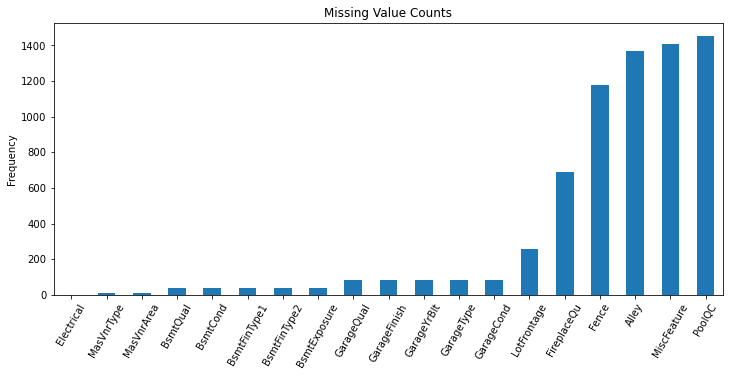

In [537]:
# Plot missing values.
na_series = df.isnull().sum().sort_values()
na_series[na_series.values >0].plot(kind='bar', 
                       figsize=(12,5), rot=60,
                                    
                       ylabel = 'Frequency',
                       title = 'Missing Value Counts')

In [538]:
#Columns that have the data description with an explanation for NaN values
##Basically indicates a lack of the feature is specified
valid_none_cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType',
                'GarageFinish','GarageQual','FireplaceQu','GarageCond']

##Filling in with value 'None' to indicate for machine learning later
df[valid_none_cols]= df[valid_none_cols].fillna('None')
df[valid_none_cols].isna().any().sum() # No more NAs.

0

In [539]:
#Organizing the other features with NaN values into numerical and categorical features
#"Invalid" simply means the data description didn't specify NaN values

invalid_none_cols = np.array(null_cols)
#Fill with feature names in null_cols that only are NOT already in valid_none_cols
invalid_none_cols = invalid_none_cols[[i not in valid_none_cols for i in invalid_none_cols]]

#Splitting
invalid_none_categ = invalid_none_cols[[i in categ_df for i in invalid_none_cols]]
print(invalid_none_categ)

['Alley' 'MasVnrType' 'Electrical' 'PoolQC' 'Fence' 'MiscFeature']


In [540]:
invalid_none_numer = invalid_none_cols[[i in numer_df for i in invalid_none_cols]]
print(invalid_none_numer)

['LotFrontage' 'MasVnrArea' 'GarageYrBlt']


#### Comment:
- From data_description.txt file:

    PoolQC: Pool quality

           Ex	Excellent
           Gd	Good
           TA	Average/Typical
           Fa	Fair
           NA	No Pool

    Fence: Fence quality

           GdPrv	Good Privacy
           MnPrv	Minimum Privacy
           GdWo	Good Wood
           MnWw	Minimum Wood/Wire
           NA	No Fence

    MiscFeature: Miscellaneous feature not covered in other categories

           Elev	Elevator
           Gar2	2nd Garage (if not described in garage section)
           Othr	Other
           Shed	Shed (over 100 SF)
           TenC	Tennis Court
           NA	None

- When read_csv() function reads the csv file, it reads NA as NaN value(as data is missing, unregistered). However, according to the data description, 'NA' is one of feature level to describ there is no feature in the corresponding house.
- Regardless this information, it is right call to drop these columns because it has too many 'NA' levels(more than half of data) which means it will not likely affect the SalePrice anyway.

In [541]:
# Remove unnecessary features.
df = df.drop(columns=["Id", "Alley","PoolQC","Fence","MiscFeature"])

In [542]:
# According to data description file, the most columns uses 'NA' as 'No fireplace', 'No basement' and etc.
# However, MasVnrType/Electrical column contains 'NA' without any designation. Then it should be missing value.

bad_categ  = pd.concat([df['MasVnrType'],df['Electrical']],axis=1)
#Getting the particular rows in the df with NaN values
bad_rows = bad_categ[bad_categ.isna().any(axis=1)]
#Deleting these rows from the total df
df = df.drop(bad_rows.index)
#Categories without NaN descriptions should no longer have NaN values

In [543]:
# 9 rows are dropped.
df.shape

(1451, 76)

In [544]:
##IMPUTING NUMERICAL FEATURES
#For the most part these values can be assumed to indicate 0 when not filled with a number
##LotFrontage has many missing values, so all 0 wouldn't be great
#GarageYrBlt makes no sense with a value of 0. We'll change these two individually
df['LotFrontage'].loc[df['LotFrontage'].isnull()].shape # 257 NAs.

(257,)

In [545]:
#Imputing LotFrontage by assuming the fill takes on the median value
#Perhaps this can be improved with comparisons to the LotArea feature?
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['LotFrontage'].isna().sum() # 0 NAs.

0

Text(0, 0.5, 'Year Built')

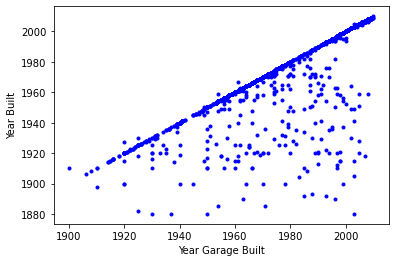

In [546]:
#Imputing GarageYrBlt based on the year the house was built
plt.plot(df["GarageYrBlt"],df["YearBuilt"],"b.")
plt.xticks(np.arange(min(df["GarageYrBlt"]),max(df["GarageYrBlt"]),20.0))
plt.xlabel("Year Garage Built")
plt.ylabel("Year Built")

In [547]:
#seems like the garage is built around the same year as the house or a bit later
#Again use the median value to fill in
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(df['YearBuilt']-(df['GarageYrBlt']-df['YearBuilt']).median())

#Fill the rest of the null values to 0
for i in invalid_none_numer:
    df[i] = df[i].fillna(0)

### 1-3. The response variable (SalePrice) Transformation
- src: https://www.marsja.se/transform-skewed-data-using-square-root-log-box-cox-methods-in-python/

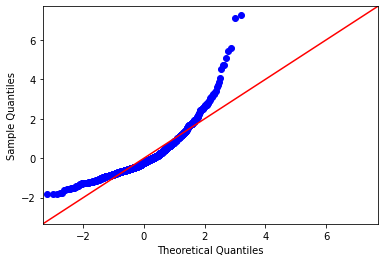

In [548]:
# See if SalePrice column is normal.
import statsmodels.api as sm
from scipy.stats import boxcox

# Use Q-Q plot to see normality. It is supposed to be straight line.
fig = sm.qqplot(df['SalePrice'], fit= True, line="45")
plt.show()

#### Comment: 
- Since we are going to use linear regression models, it is necessary to transform the response variable normally distributed. Becuase the response variable is linear combination of feature variables.

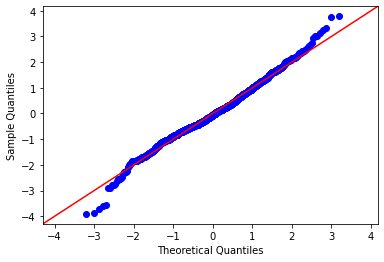

In [549]:
# Log transformation.
fig = sm.qqplot(np.log(df['SalePrice']), fit= True, line="45")
plt.show()

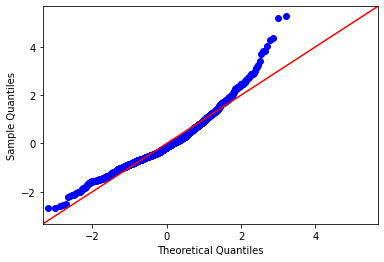

In [550]:
# Sqrt transformation.
fig = sm.qqplot(np.sqrt(df['SalePrice']), fit= True, line="45")
plt.show()

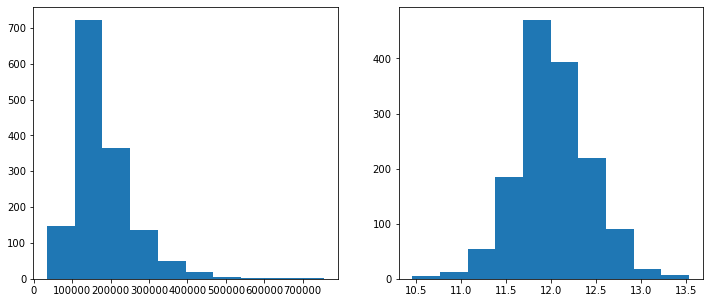

In [551]:
# Compare distribution.
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.hist(df['SalePrice'])
ax2.hist(np.log(df['SalePrice']))
plt.show()

#### Comment:
- Since log transformation normalizes the response variable, apply log transformation on SalePrice column.

In [552]:
# Apply log transformation.
df['SalePrice'] = np.log(df['SalePrice'])

### 1-4. Removing Outliers

In [553]:
# GrLivArea and GarageArea columns have relatively large correlation with the SalePrice.
# Use scatterplots to detect the outliers.
def visualDetectionOutlier(train_df):
    sp = train_df['SalePrice']
    fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(7,12))
    axes[0].scatter(x=train_df['GrLivArea'],y=sp, alpha=0.5)
    axes[0].set_title("GrLivArea vs SalePrice")
    axes[0].set_xlabel("sqft")
    axes[0].set_ylabel("Price")
    axes[1].scatter(x=train_df['GarageArea'],y=sp, alpha=0.5)
    axes[1].set_title("GarageArea vs SalePrice")
    axes[1].set_xlabel("sqft")
    axes[1].set_ylabel("Price")
    fig.tight_layout()
    plt.show()

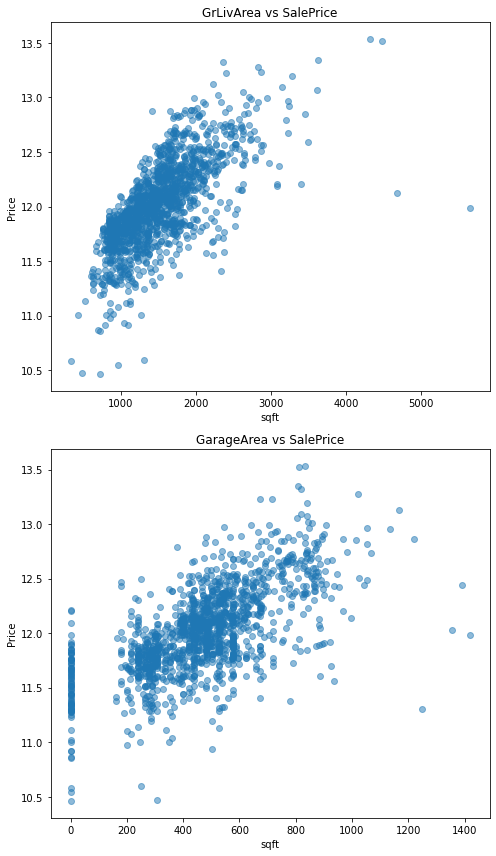

In [554]:
# Before removing outliers.
visualDetectionOutlier(df)

In [555]:
# [Plot 1: GrLivArea vs SalePrice] Bottom right two points look like outliers.
ol_plot1_bottomright = df.loc[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 300000)]
# [Plot 2: GarageArea vs SalePrice] Bottom right four points look like outliers.
ol_plot2_bottomright = df.loc[((df['GarageArea'] > 1200) & (df['SalePrice'] < 300000))]
# [Plot 2: GarageArea vs SalePrice] Top middle two points look like outliers.
ol_plot2_topmiddle = df.loc[((df['GarageArea'] > 800) & (df['GarageArea'] < 1000)) &
                                  (df['SalePrice'] > 700000)]
# Remove the outliers.
df = df.drop(ol_plot1_bottomright.index.append(ol_plot2_bottomright.index).
                         append(ol_plot2_topmiddle.index))

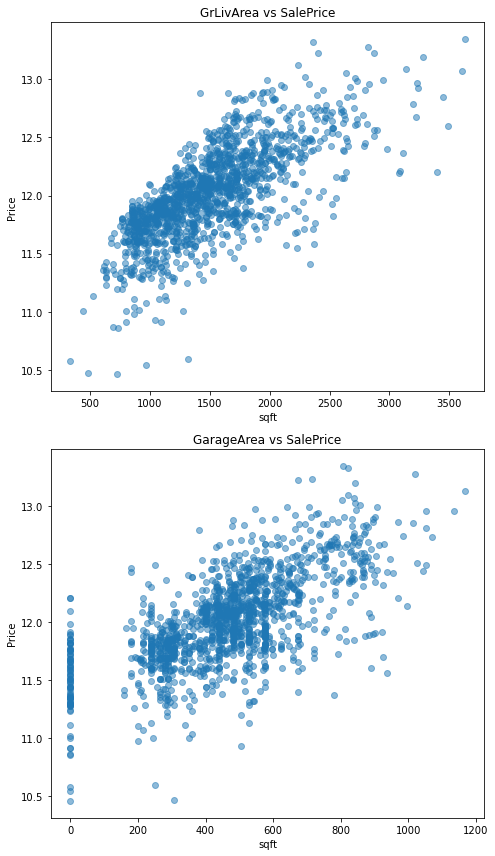

In [556]:
# Check out the linearity again.
visualDetectionOutlier(df)

### 1-5. Min-Max Scale Numerical Columns

In [557]:
# Select categorical and numerical columns from the cleaned dataframe.
categ_df = df.select_dtypes(include=['object'])
numer_df = df.select_dtypes(exclude=['object']).drop(columns='SalePrice')

In [558]:
# Transform numerical columns.
# Use MinMaxScaler.
scaler = MinMaxScaler()

# Numerical column names.
numer_col_names = numer_df.columns
numer_col_names

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [559]:
# Transform the numerical columsn.
df[numer_col_names] = scaler.fit_transform(df[numer_col_names])
df[numer_col_names]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.322669,0.000000,0.064212,...,0.469983,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.50
1,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.446984,0.000000,0.121575,...,0.394511,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.25
2,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.222121,0.000000,0.185788,...,0.521441,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.50
3,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.098720,0.000000,0.231164,...,0.550600,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.00
4,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.299360,0.000000,0.209760,...,0.716981,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.140411,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,0.407962,...,0.394511,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.636364,0.25
1456,0.219178,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.361060,0.110583,0.252140,...,0.428816,0.407235,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.090909,1.00
1457,0.154110,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.125686,0.000000,0.375428,...,0.216123,0.000000,0.109689,0.000000,0.0,0.0,0.0,0.16129,0.363636,1.00
1458,0.160959,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.022395,0.698100,0.000000,...,0.205832,0.427071,0.000000,0.202899,0.0,0.0,0.0,0.00000,0.272727,1.00


### 6. Correlation Matrix 

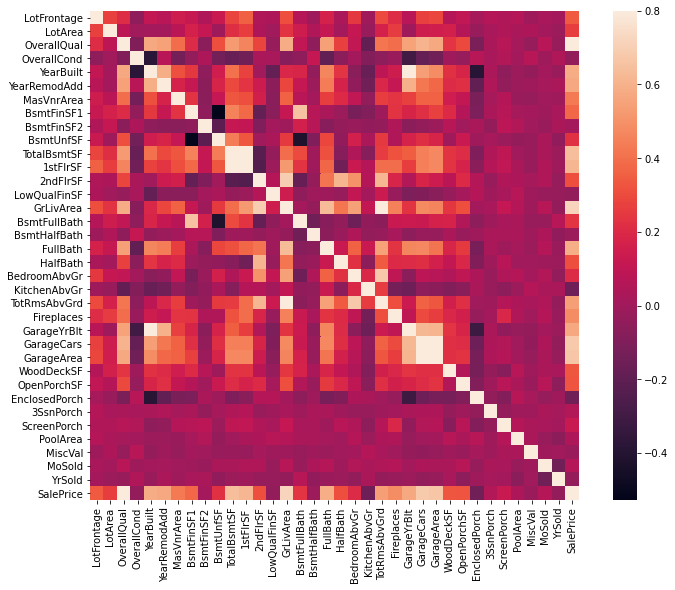

In [560]:
# Correlation matrix.
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [561]:
#Find out which parameters appear to have an appreciable linear relationship with SalePrice
#Arbitrary 0.5 correlation cutoff
print("List of parameters that have a good linear model fit to Sale Price")
corr_series = corrmat['SalePrice'].sort_values()[:-1]
corr_series[(corr_series > 0.5) | (corr_series < -0.5)]

List of parameters that have a good linear model fit to Sale Price


TotRmsAbvGrd    0.535635
YearRemodAdd    0.566891
GarageYrBlt     0.571302
YearBuilt       0.587201
FullBath        0.591328
1stFlrSF        0.613928
TotalBsmtSF     0.640654
GarageArea      0.666923
GarageCars      0.684121
GrLivArea       0.718665
OverallQual     0.818133
Name: SalePrice, dtype: float64

### 7. One-Hot Encoding Categorical Columns

In [562]:
# The categorical columns to be encoded.
categ_df.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [563]:
#Pandas One Hot Encoding.
df = pd.get_dummies(df, columns=categ_df.columns,prefix=categ_df.columns, drop_first=True)

In [564]:
df

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.322669,0.000000,0.064212,...,0,0,0,0,1,0,0,0,1,0
1,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.446984,0.000000,0.121575,...,0,0,0,0,1,0,0,0,1,0
2,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.222121,0.000000,0.185788,...,0,0,0,0,1,0,0,0,1,0
3,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.098720,0.000000,0.231164,...,0,0,0,0,1,0,0,0,0,0
4,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.299360,0.000000,0.209760,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.140411,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,0.407962,...,0,0,0,0,1,0,0,0,1,0
1456,0.219178,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.361060,0.110583,0.252140,...,0,0,0,0,1,0,0,0,1,0
1457,0.154110,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.125686,0.000000,0.375428,...,0,0,0,0,1,0,0,0,1,0
1458,0.160959,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.022395,0.698100,0.000000,...,0,0,0,0,1,0,0,0,1,0


In [565]:
df.shape

(1443, 258)

### Notes
- Use "df" for the cleaned data
- Some features, like 'PoolArea', seem to mostly have all the same values. Perhaps worth dropping these as well if too many features for the model?
- Correlation matrix will help with linear regression model.
- Remember that the SalePrice column is log-transform to attain the linearity.

In [566]:
df["PoolArea"].value_counts()

0.000000    1438
0.703252       1
0.780488       1
0.693767       1
0.878049       1
1.000000       1
Name: PoolArea, dtype: int64

# 2. ML Algorithms

### 2.1 KNN regression

In [593]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score

In [594]:
# KFold(n_splits=10, random_state=21, shuffle=False)

In [595]:
# Split the data set. (80:20 = traning:test)
train, test = train_test_split(df, test_size=0.2,random_state=21)

In [596]:
# Select all columns.
X_train, y_train = df.copy().drop(columns='SalePrice'), df['SalePrice']
X_test, y_test = df.copy().drop(columns='SalePrice'), df['SalePrice']

In [597]:
# Define k-NN model.
KNN = KNeighborsRegressor(n_neighbors=5, algorithm='auto', 
                          weights='uniform', n_jobs = -1)
# Fit the model.
KNN.fit(X_train,y_train)

KNeighborsRegressor(n_jobs=-1)

In [598]:
y_pred = KNN.predict(X_test)
y_pred

array([12.25919101, 12.01983296, 12.3432826 , ..., 12.33252138,
       11.84834357, 11.76726338])

In [599]:
# Coefficient of determination. Best possible score is 1.0.
r2_score(y_test, y_pred)

0.8514137584114895

In [600]:
# Select only numerical features.
X_train, y_train = df[numer_df.columns].copy(), df['SalePrice']
X_test, y_test = df[numer_df.columns].copy(), df['SalePrice']

In [601]:
# Define k-NN model.
KNN = KNeighborsRegressor(n_neighbors=5, algorithm='auto', 
                          weights='uniform', n_jobs = -1)
# Fit the model.
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
y_pred
r2_score(y_test, y_pred)

0.8721335402543073